In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

### Data Exploration

In [2]:
parent_path = str(os.path.dirname(os.getcwd()))

In [3]:
whites = pd.read_csv(parent_path + "/data/winequality-white.csv", delimiter = ";")

In [4]:
whites.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


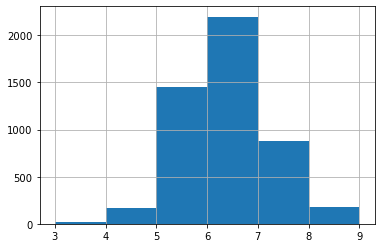

In [5]:
whites['quality'].hist(bins = 6)

In [6]:
whites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [7]:
whites.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


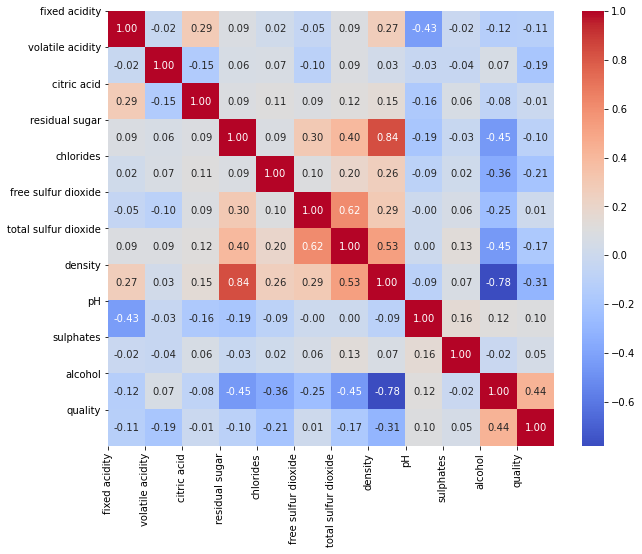

In [8]:
#correlation heat map_red wine
corr = whites.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(10, 8))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()

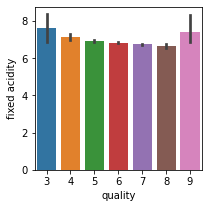

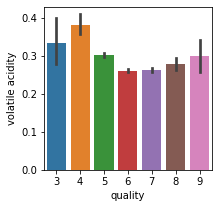

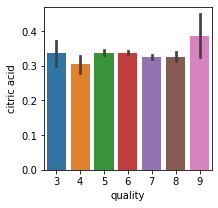

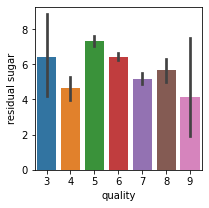

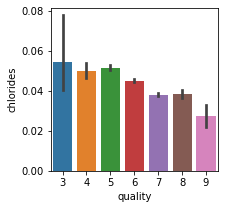

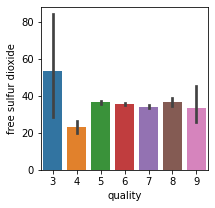

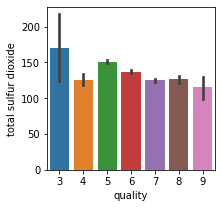

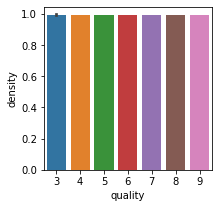

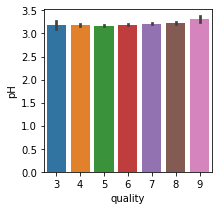

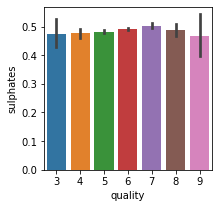

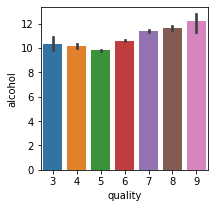

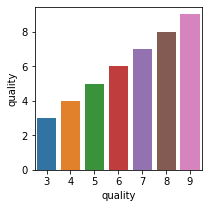

In [9]:
#visualize how does input var is related to target var,if the plot has a clear pattern, that certain input var might 
#has strong correlation to the target
#white wine

for i in list(whites.columns):
    fig = plt.figure(figsize = (3,3))
    sns.barplot(x = 'quality', y = i, data = whites)

Observing VIF

In [10]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

vif_whites = pd.DataFrame()
vif_whites["feature"] = whites.columns[:-1]

vif_whites["VIF"] = [variance_inflation_factor(whites[whites.columns[:-1]].values, i) 
                          for i in range(len(whites[whites.columns[:-1]].columns))] 

vif_whites

,feature,VIF
0,fixed acidity,92.861483
1,volatile acidity,9.730569
2,citric acid,10.007114
3,residual sugar,3.830272
4,chlorides,6.497448
5,free sulfur dioxide,9.261556
6,total sulfur dioxide,24.980802
7,density,1056.497431
8,pH,609.861725
9,sulphates,20.527123


### Feature Engineering

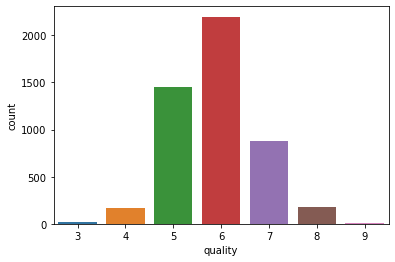

In [11]:
sns.countplot(x='quality', data=whites)

Create binary for "good" or "not good" wine based on 0-7 < quality < 7.1-10.

In [12]:
whites['is_good'] = np.where(whites['quality'] < 7, 0, 1)
whites = whites.drop(['quality'], axis = 1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f86acdf6310>,
      dtype=object)

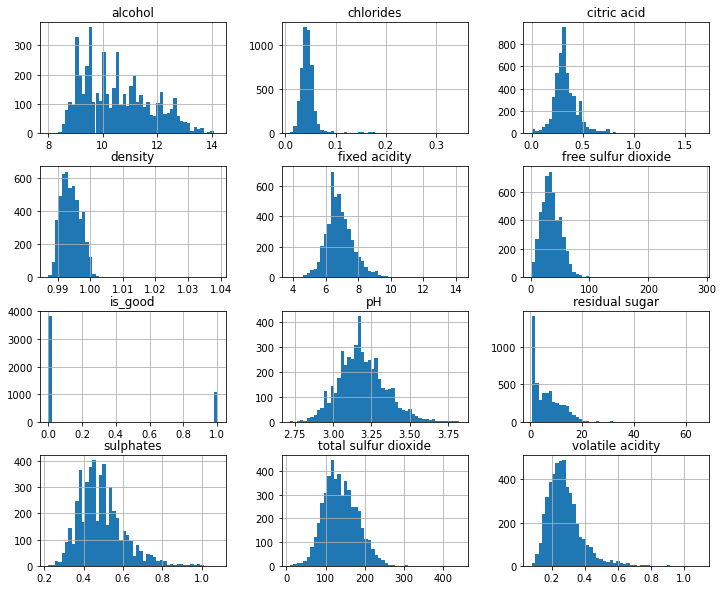

In [13]:
whites.hist(figsize = (12,10), bins = 50)

In [14]:
for i in ['volatile acidity', 'residual sugar', 'free sulfur dioxide', 'sulphates', 'chlorides']:
    whites[i] = whites[i].apply(np.log)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f86afda2f70>,
      dtype=object)

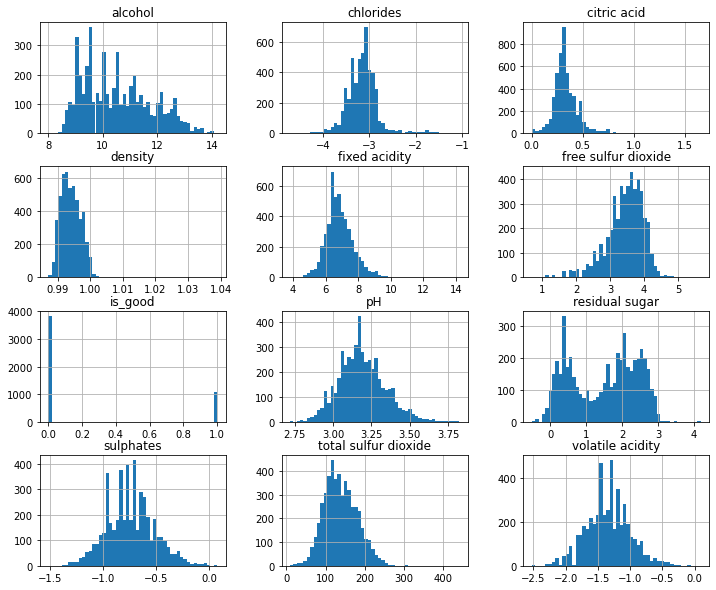

In [15]:
whites.hist(figsize = (12,10), bins = 50)

Standardize Data

In [16]:
#split x, y
whites_y = whites['is_good']
whites_x = whites.drop(['is_good'], axis=1)

In [17]:
#standardize x
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = StandardScaler().fit_transform(whites_x.values)
whites_x = pd.DataFrame(scaled_features, index=whites_x.index, columns=whites_x.columns)

#train, test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(whites_x, whites_y, test_size=0.33, random_state=42)

In [18]:
#confirm mean 0, std 1
x_train.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,3281.000000,3281.000000,3281.000000,3281.000000,3281.000000,3281.000000,3281.000000,3281.000000,3281.000000,3281.000000,3281.000000
mean,0.009985,0.009558,-0.004086,0.001509,-0.012307,-0.004378,-0.004984,0.008612,0.009623,-0.002549,-0.000898
std,1.002684,0.997781,0.997365,1.006326,0.994736,1.010430,0.988873,1.019676,0.996332,0.995395,1.001164
min,-3.620351,-3.513960,-2.761743,-2.161070,-4.714791,-4.267293,-3.020697,-2.313038,-3.101408,-3.463295,-2.043297
25%,-0.657501,-0.659738,-0.530476,-1.031083,-0.614127,-0.546796,-0.714474,-0.771543,-0.650836,-0.681281,-0.824276
50%,-0.064931,-0.028093,-0.117278,0.181990,0.007414,0.167146,-0.102619,-0.109468,-0.054751,-0.070940,-0.092863
75%,0.527639,0.631853,0.378559,0.891506,0.462803,0.719282,0.697499,0.699733,0.673797,0.631504,0.719818
max,5.860770,4.237751,10.956420,2.935700,6.303501,2.835145,3.980337,15.031298,4.184075,3.563567,2.995326


In [19]:
whites_scaled = pd.concat([whites_x, whites_y], axis = 1)

### Feature Ranking

In [20]:
from sklearn.tree import DecisionTreeClassifier

#build a decision tree with max_depth = 20 using entropy
dt = DecisionTreeClassifier(criterion = 'entropy', max_depth = 20)
dt.fit(whites_x, whites_y)

#Now use built in feature importance attribute to get MI of each feature and Y
feature_mi = dt.feature_importances_

In [21]:
feature_mi_dict_white = dict(zip(whites_x.columns.values, feature_mi))

In [22]:
#define a function to print ROC curves. 
#It should take in only arrays/lists of predictions and outcomes
from sklearn.metrics import roc_curve, auc

def plotUnivariateROC(preds, truth, label_string):
    '''
    preds is an nx1 array of predictions
    truth is an nx1 array of truth labels
    label_string is text to go into the plotting label
    '''
    #1. call the roc_curve function to get the ROC X and Y values
    fpr, tpr, thresholds = roc_curve(truth, preds)
    #2. Input fpr and tpr into the auc function to get the AUC
    roc_auc = auc(fpr, tpr)
    
    #we are doing this as a special case because we are sending unfitted predictions
    #into the function
    if roc_auc < 0.5:
        fpr, tpr, thresholds = roc_curve(truth, -1 * preds)
        roc_auc = auc(fpr, tpr)

    #chooses a random color for plotting
    c = (np.random.rand(), np.random.rand(), np.random.rand())

    #create a plot and set some options
    plt.plot(fpr, tpr, color = c, label = label_string + ' (AUC = %0.3f)' % roc_auc)
    

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC')
    plt.legend(loc="lower right")
    
    return roc_auc

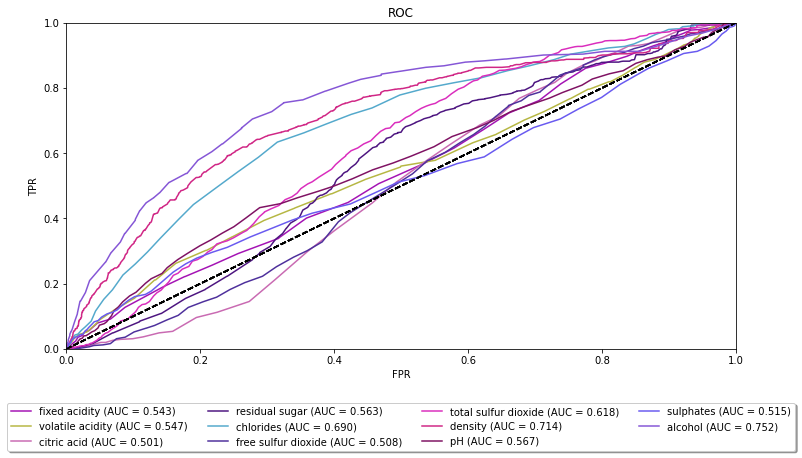

In [23]:
fig = plt.figure(figsize = (12, 6))
ax = plt.subplot(111)

#Plot the univariate AUC on the training data. Store the AUC

feature_auc_dict_white = {}
for col in whites_scaled.drop('is_good',1).columns:
    feature_auc_dict_white[col] = plotUnivariateROC(whites_scaled[col], whites_y, col)


# Put a legend below current axis
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.0 , box.width, box.height * 1])
ax.legend(loc = 'upper center', bbox_to_anchor = (0.5, -0.15), fancybox = True, 
              shadow = True, ncol = 4, prop = {'size':10})

In [24]:
#Add auc and mi each to a single dataframe
df_auc = pd.DataFrame(pd.Series(feature_auc_dict_white), columns = ['auc'])
df_mi = pd.DataFrame(pd.Series(feature_mi_dict_white), columns = ['mi'])

#Now merge the two on the feature name
feat_imp_df = df_auc.merge(df_mi, left_index = True, right_index = True)
feat_imp_df

,auc,mi
fixed acidity,0.542719,0.069140
volatile acidity,0.546597,0.088851
citric acid,0.500781,0.098241
residual sugar,0.562697,0.068044
chlorides,0.690441,0.056814
free sulfur dioxide,0.508142,0.073725
total sulfur dioxide,0.617750,0.082347
density,0.713980,0.081252
pH,0.566596,0.079014
sulphates,0.515299,0.079188


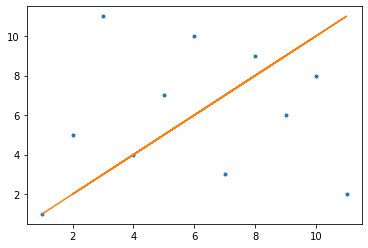

In [25]:
#Now create a df that holds the ranks of auc and mi 
feat_ranks = feat_imp_df.rank(axis = 0, ascending = False)

#Plot the two ranks
plt.plot(feat_ranks.auc, feat_ranks.mi, '.')
#Plot a y=x reference line
plt.plot(feat_ranks.auc, feat_ranks.auc,)

In [26]:
#Now create lists of top 5 features for both auc and mi
top5_auc = list(feat_ranks[(feat_ranks.auc <= 5)].index.values)
top5_mi = list(feat_ranks[(feat_ranks.mi <= 5)].index.values)
top5_auc, top5_mi

(['chlorides', 'total sulfur dioxide', 'density', 'pH', 'alcohol'],
 ['volatile acidity',
  'citric acid',
  'total sulfur dioxide',
  'density',
  'alcohol'])

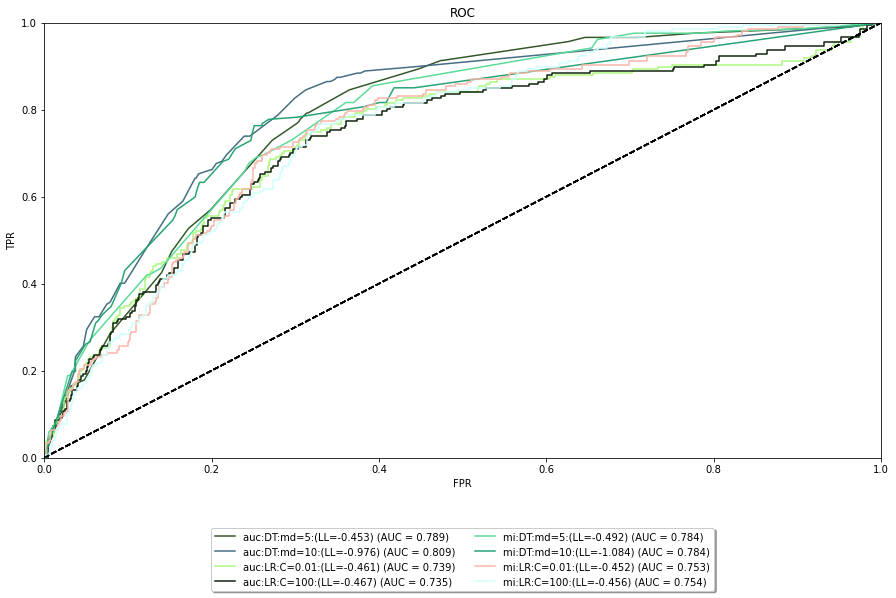

In [27]:
'''
Now do the following
1. Split the data into 80/20 train/test
2. For each set of features:
- build two decision trees (max_depth in {10, 20}) 
- build two logistic regression (C in {10**-2, 10**2})
- get the auc and log-loss on the test set
'''
from sklearn.linear_model import LogisticRegression


def getLogLoss(Ps, Ys, eps = 10**-6):
    return ((Ys == 1) * np.log(Ps + eps) + (Ys == 0) * np.log(1 - Ps + eps)).mean()

#Split into train and test randomly without using sklearn package
#Note, there are many ways to do this:

train_pct = 0.8
#1. create an array of n random uniform variables drawn on [0,1] range
rand = np.random.rand(whites_scaled.shape[0])
#2. Convert to boolean where True = random number < train_pct
rand_filt = (rand < train_pct)

#Use the filter to index data

train = whites_scaled[rand_filt]
test = whites_scaled[(rand_filt == False)]


fsets = [top5_auc, top5_mi]
fset_descr = ['auc', 'mi']
mxdepths = [5, 10]
Cs = [10**-2, 10**2]


#Set up plotting box
fig = plt.figure(figsize = (15, 8))
ax = plt.subplot(111)


for i, fset in enumerate(fsets):
    descr = fset_descr[i]
    #set training and testing data
    Y_train = train['is_good']
    X_train = train[fset]
    Y_test = test['is_good']
    X_test = test[fset]
    
    for d in mxdepths:
        dt = DecisionTreeClassifier(criterion = 'entropy', max_depth = d)
        dt.fit(X_train, Y_train)
        preds_dt = dt.predict_proba(X_test)[:, 1]
        ll_dt = getLogLoss(preds_dt, Y_test)
        
        plotUnivariateROC(preds_dt, Y_test, '{}:DT:md={}:(LL={})'.format(descr, d, round(ll_dt, 3)))

        
    for C in Cs:
        lr = LogisticRegression(C = C)
        lr.fit(X_train, Y_train)
        preds_lr = lr.predict_proba(X_test)[:, 1]
        ll_lr = getLogLoss(preds_lr, Y_test)

        plotUnivariateROC(preds_lr, Y_test, '{}:LR:C={}:(LL={})'.format(descr, C, round(ll_lr, 3)))

    
# Put a legend below current axis
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.0 , box.width, box.height * 1])
ax.legend(loc = 'upper center', bbox_to_anchor = (0.5, -0.15), fancybox = True, 
              shadow = True, ncol = 2, prop = {'size':10})

### Feature Selection

In [30]:
vif_whites = pd.DataFrame()
vif_whites["feature"] = whites_scaled.columns[:-1]

vif_whites["VIF"] = [variance_inflation_factor(whites_scaled[whites_scaled.columns[:-1]].values, i) 
                          for i in range(len(whites_scaled[whites_scaled.columns[:-1]].columns))] 

vif_whites

,feature,VIF
0,fixed acidity,1.828567
1,volatile acidity,1.156441
2,citric acid,1.153274
3,residual sugar,4.542915
4,chlorides,1.393057
5,free sulfur dioxide,1.736008
6,total sulfur dioxide,2.199714
7,density,10.357201
8,pH,1.586563
9,sulphates,1.098830


In [31]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter = 1000).fit(x_train, y_train)
lr_predict = lr.predict(x_test)
lr_predict_prob = lr.predict_proba(x_test)[:,1]

In [32]:
lr_vif = LogisticRegression(max_iter = 1000).fit(x_train.drop("density", axis=1), y_train)
lr_predict_vif = lr_vif.predict(x_test.drop("density", axis=1))
lr_predict_prob_vif = lr_vif.predict_proba(x_test.drop("density", axis=1))[:,1]

In [33]:
from sklearn.metrics import roc_curve, auc

def plot_ROC(truth,preds,label_string):
    fpr, tpr, thresholds = roc_curve(truth,preds)
    roc_auc = auc(fpr,tpr)
    
    
    #choose a random color for plotting:
    c = (np.random.rand(), np.random.rand(), np.random.rand())
    plt.plot(fpr, tpr, color = c, label = label_string + ' (AUC = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC')
    plt.legend(loc="lower right")

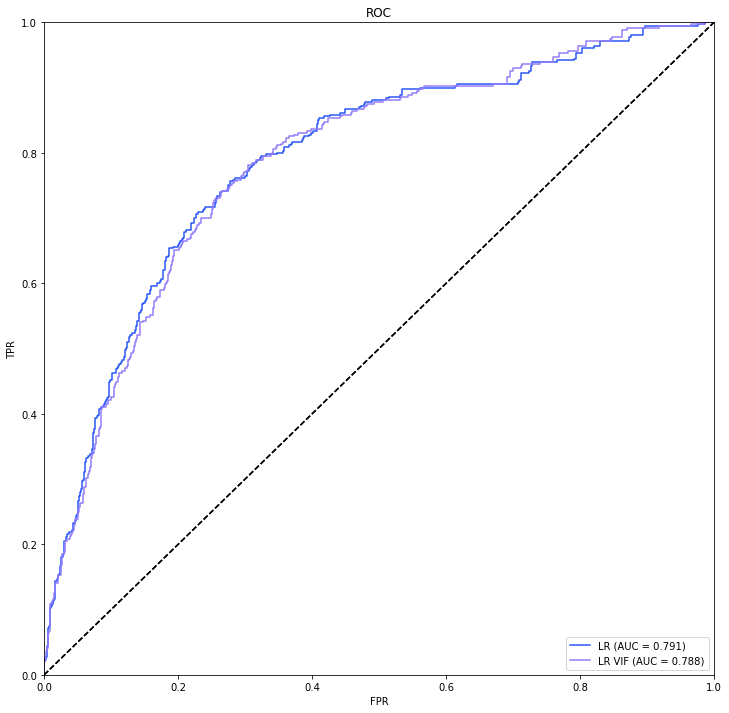

In [34]:
plt.rcParams['figure.figsize'] = 12, 12
plot_ROC(y_test,lr_predict_prob,"LR")
plot_ROC(y_test,lr_predict_prob_vif,"LR VIF")

Not worth removing highest VIF feature

### Data For Modeling -- NOTE TO TEAM

In [35]:
#use these dfs:

#x_train
#x_test
#y_train
#y_test

#these are the dfs before being split into train/test:
#whites_scaled
#whites_x
#whites_y

### Unsupervised Clustering

In [36]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering().fit(whites_x)

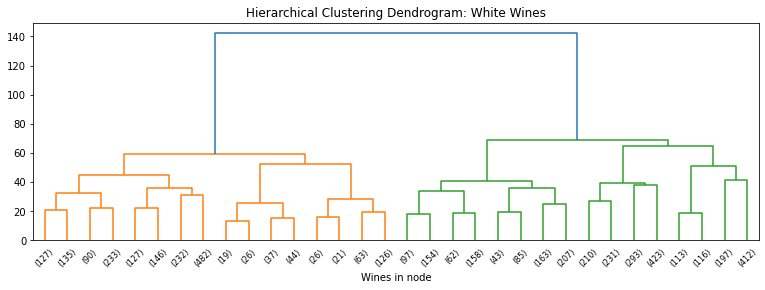

In [37]:
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(whites_x)
plt.figure(figsize=(13,4))
plt.title('Hierarchical Clustering Dendrogram: White Wines')
plot_dendrogram(model, truncate_mode='level', p=4)
plt.xlabel("Wines in node")
plt.show()

K-means clustering

In [38]:
from sklearn.cluster import KMeans

kmeans_whites = KMeans(n_clusters=3, random_state=0).fit(whites_x)
labels_whites = KMeans(n_clusters=3, random_state=0).fit_predict(whites_x)

Text(0.5, 1.0, 'Red Wine KMeans')

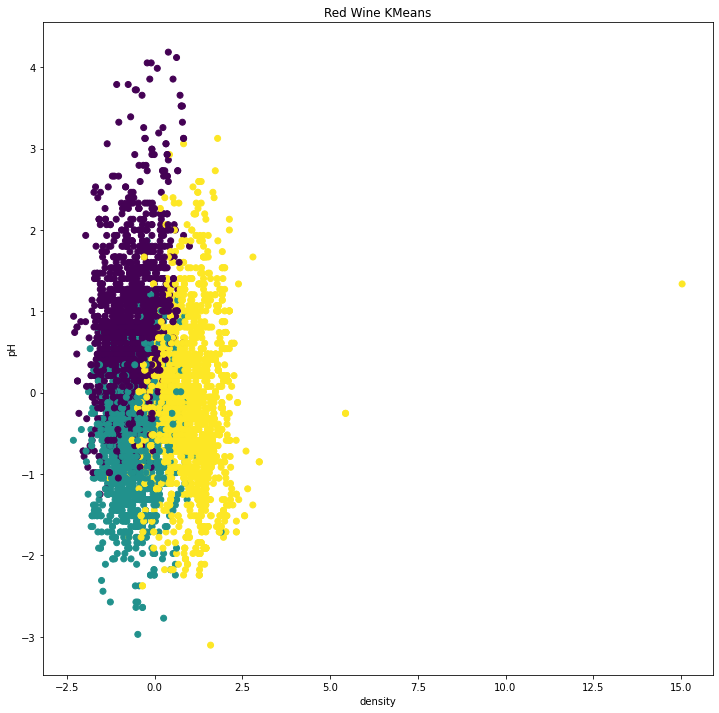

In [39]:
plt.scatter(whites_x['density'], whites_x['pH'], c = labels_whites)
plt.xlabel("density")
plt.ylabel("pH")
plt.title("Red Wine KMeans")

### Train Baseline Models

In [40]:
#random forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [41]:
#logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [42]:
#naive bayes

In [43]:
#knn/svm

### Baseline Model Evaluation

In [44]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [45]:
#rf
#mean roc_auc from five-fold cross-validation
np.mean(cross_val_score(rf, x_test, y_test, cv= 5, scoring = 'roc_auc'))

0.8578677528536767

In [50]:
#lr
#mean roc_auc from five-fold cross-validation
np.mean(cross_val_score(lr, x_test, y_test, cv=5, scoring = 'roc_auc'))

0.7869751851957731

### Tune with Grid Search

In [46]:
from sklearn.model_selection import GridSearchCV

Random Forest

In [47]:
#rf
param_grid = {'criterion': ['gini', 'entropy'], 'max_depth': [None, 5, 25, 50],
             'min_samples_split': [2, 10], 'min_samples_leaf': [1,5,10],
             'class_weight': [None, 'balanced']}

search = GridSearchCV(rf, param_grid, cv=5, scoring = 'roc_auc')
search.fit(x_train, y_train)
search.best_params_

{'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': 50,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [48]:
rf_tuned = RandomForestClassifier(class_weight = 'balanced', criterion = 'entropy', max_depth = None,
                                  min_samples_leaf = 1, min_samples_split = 2)

Logistic Regression

In [55]:
#lr
import warnings
warnings.filterwarnings('ignore')
param_grid = {"C":[0.001,0.01,0.1,1,10,100,1000], "penalty":["l1","l2"], 
              "solver":["newton-cg","lbfgs","liblinear","sag","saga"]}
clf = GridSearchCV(lr, param_grid, cv=5, scoring = 'roc_auc')
clf.fit(x_train, y_train)
clf.best_params_

{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}

In [56]:
lr_tuned = LogisticRegression(C = 1, penalty = "l2", solver = "liblinear")

Naive Bayes

SVM/K-NN

### Metric Evaluation

In [49]:
#rf
#mean roc_auc from five-fold cross-validation
np.mean(cross_val_score(rf_tuned, x_test, y_test, cv= 5, scoring = 'roc_auc'))

0.8711609163596876

In [57]:
#lr
np.mean(cross_val_score(lr_tuned, x_test, y_test, cv=5, scoring='roc_auc'))

0.7869421362651638

In [154]:
#nb

In [155]:
#svm/k-nn

### ROC Curve Plot

In [ ]:
def plot_ROC(truth,preds,label_string):

    fpr, tpr, thresholds = roc_curve(truth,preds)
    roc_auc = auc(fpr,tpr)
    
    c = (np.random.rand(), np.random.rand(), np.random.rand())
    plt.plot(fpr, tpr, color = c, label = label_string + ' (AUC = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC Curves for Select Models')
    plt.legend(loc="lower right")

In [ ]:
dict_vals = {"RF": rf_predict_prob[:,1], "LR": lr_predict_prob[:,1],
            "KNN": knn_predict_prob[:,1], "NB": nb_predict_prob[:,1]}

fig = plt.figure(figsize = (6, 5))
ax = plt.subplot(111)

for i in dict_vals:
    plot_ROC(y_test, dict_vals[i], i)